In [175]:
#imports
#imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import  GaussianNB, BernoulliNB
from tensorflow import keras
from sklearn.metrics import accuracy_score
from datetime import datetime
from tensorflow.keras.layers.experimental import preprocessing


In [191]:
#fits
np.random.seed(1)
tf.random.set_seed(1)
def regressaoLinear(X_train, Y_train, X_test, Y_test):
    normalizer = preprocessing.Normalization()
    display(normalizer)
    normalizer.adapt(X_train)
    model = keras.Sequential([
        normalizer,
        layers.Dense(1)
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

    history = model.fit(
    X_train, Y_train,
    epochs=10000,
    validation_split = 0.2,
    verbose=1)

    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)
    plt.show()
    y_pred = model.predict(X_test)
    print((y_pred.reshape(-1) - Y_test).mean()) 
    error = y_pred.reshape(-1) - Y_test
    plt.hist(error, bins=15)
    plt.ylabel('Count')
    plt.show()
    

In [177]:
#utils
def shuffle(X, y):
    return train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=True)


In [178]:
# def loadDataset()-> DataFrame:
#     return pd.read_csv('dataset/car data.csv')

# def loadDataset2()-> DataFrame:
#     return pd.read_csv('dataset/car data2.csv')


def loadDataset()-> DataFrame:
    return pd.read_csv('dataset/CAR DETAILS FROM CAR DEKHO.csv')

In [179]:

dt = loadDataset()
display(dt.dtypes)
display(len(dt))
dt = pd.get_dummies(dt, columns=['fuel','seller_type','transmission', 'owner'])

ano_atual = datetime.now().year
age =dt['year'].apply(lambda x:ano_atual-x)
dt.drop('year',axis=1,inplace=True)
dt.insert(0,'Age',age);

display(dt.describe())
display(dt.isnull().sum())
display(dt.head(5))
display(dt.describe())
display(dt['selling_price'].idxmax())
display(dt.loc[3872])
# nada null

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

4340

,Age,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,10.909217,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,4.000000,2.000000e+04,1.000000
25%,8.000000,2.087498e+05,35000.000000
50%,10.000000,3.500000e+05,60000.000000
75%,13.000000,6.000000e+05,90000.000000
max,32.000000,8.900000e+06,806599.000000


Age                             0
name                            0
selling_price                   0
km_driven                       0
fuel_CNG                        0
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Dealer              0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Automatic          0
transmission_Manual             0
owner_First Owner               0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64

,Age,name,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,17,Maruti 800 AC,60000,70000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
1,17,Maruti Wagon R LXI Minor,135000,50000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
2,12,Hyundai Verna 1.6 SX,600000,100000,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False
3,7,Datsun RediGO T Option,250000,46000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
4,10,Honda Amaze VX i-DTEC,450000,141000,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False


,Age,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,10.909217,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,4.000000,2.000000e+04,1.000000
25%,8.000000,2.087498e+05,35000.000000
50%,10.000000,3.500000e+05,60000.000000
75%,13.000000,6.000000e+05,90000.000000
max,32.000000,8.900000e+06,806599.000000


3872

Age                                                                    8
name                            Audi RS7 2015-2019 Sportback Performance
selling_price                                                    8900000
km_driven                                                          13000
fuel_CNG                                                           False
fuel_Diesel                                                        False
fuel_Electric                                                      False
fuel_LPG                                                           False
fuel_Petrol                                                         True
seller_type_Dealer                                                  True
seller_type_Individual                                             False
seller_type_Trustmark Dealer                                       False
transmission_Automatic                                              True
transmission_Manual                                

Age                              int64
name                            object
selling_price                    int64
km_driven                        int64
fuel_CNG                          bool
fuel_Diesel                       bool
fuel_Electric                     bool
fuel_LPG                          bool
fuel_Petrol                       bool
seller_type_Dealer                bool
seller_type_Individual            bool
seller_type_Trustmark Dealer      bool
transmission_Automatic            bool
transmission_Manual               bool
owner_First Owner                 bool
owner_Fourth & Above Owner        bool
owner_Second Owner                bool
owner_Test Drive Car              bool
owner_Third Owner                 bool
dtype: object

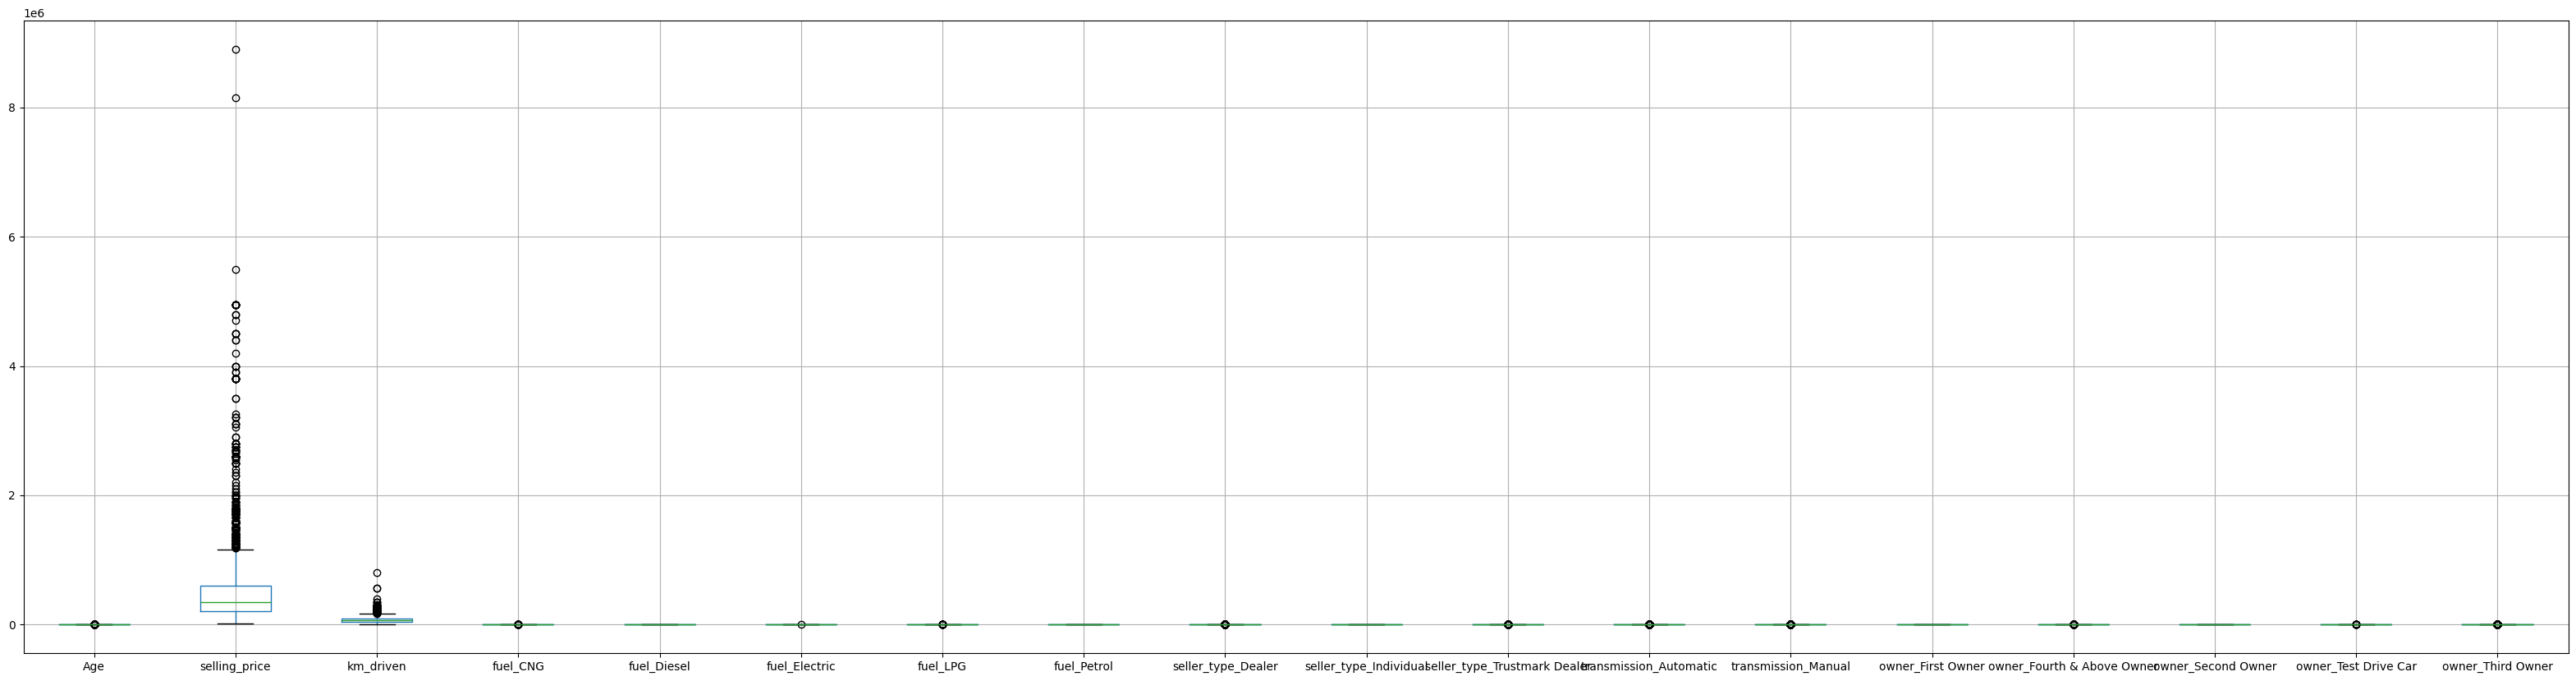

In [180]:
dt.boxplot(figsize=(40,10))
display(dt.dtypes)


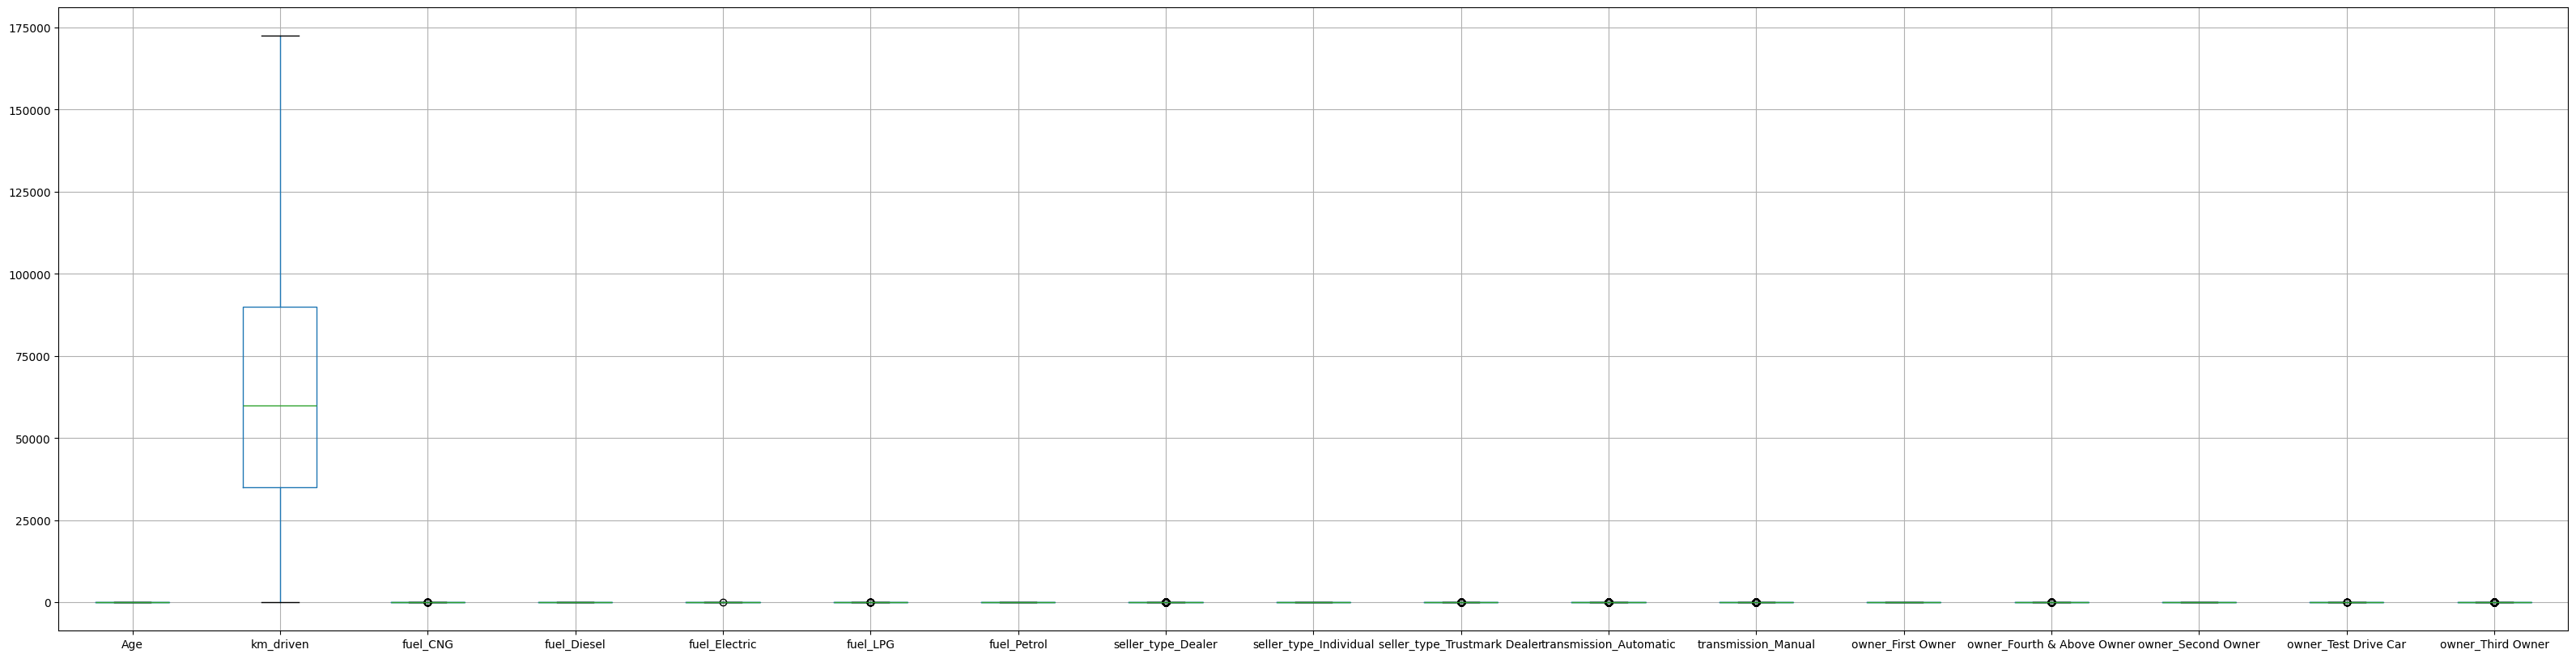

,Age,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,17.0,70000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
1,17.0,50000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
2,12.0,100000,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False
3,7.0,46000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
4,10.0,141000,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False


,Age,km_driven
count,4340.000000,4340.000000
mean,10.839977,64711.526267
std,4.016018,39833.930145
min,4.000000,1.000000
25%,8.000000,35000.000000
50%,10.000000,60000.000000
75%,13.000000,90000.000000
max,20.500000,172500.000000


In [181]:


dt2 = dt.copy()
dt2y = dt2.selling_price
dt2x = dt2.drop(columns=['selling_price', 'name'])
k = 1.5
for col in dt2x.select_dtypes('int64'):
# for col in dt2x.columns:
    Q1 = dt2x[col].quantile(0.25)
    Q3 = dt2x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    dt2x[col] = dt2x[col].clip(lower=Q1 - k * IQR, upper=Q3 + k * IQR)


# dt2.drop(index=[86,196],inplace=True)
# dt2.reset_index(drop=True,inplace=True)

dt2x.boxplot(figsize=(40,10))
plt.show()



display(dt2x.head())
display(dt2x.describe())


,Age,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,selling_price
0,17.0,70000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,60000
1,17.0,50000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,135000
2,12.0,100000,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,600000
3,7.0,46000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,250000
4,10.0,141000,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,450000


<Axes: >

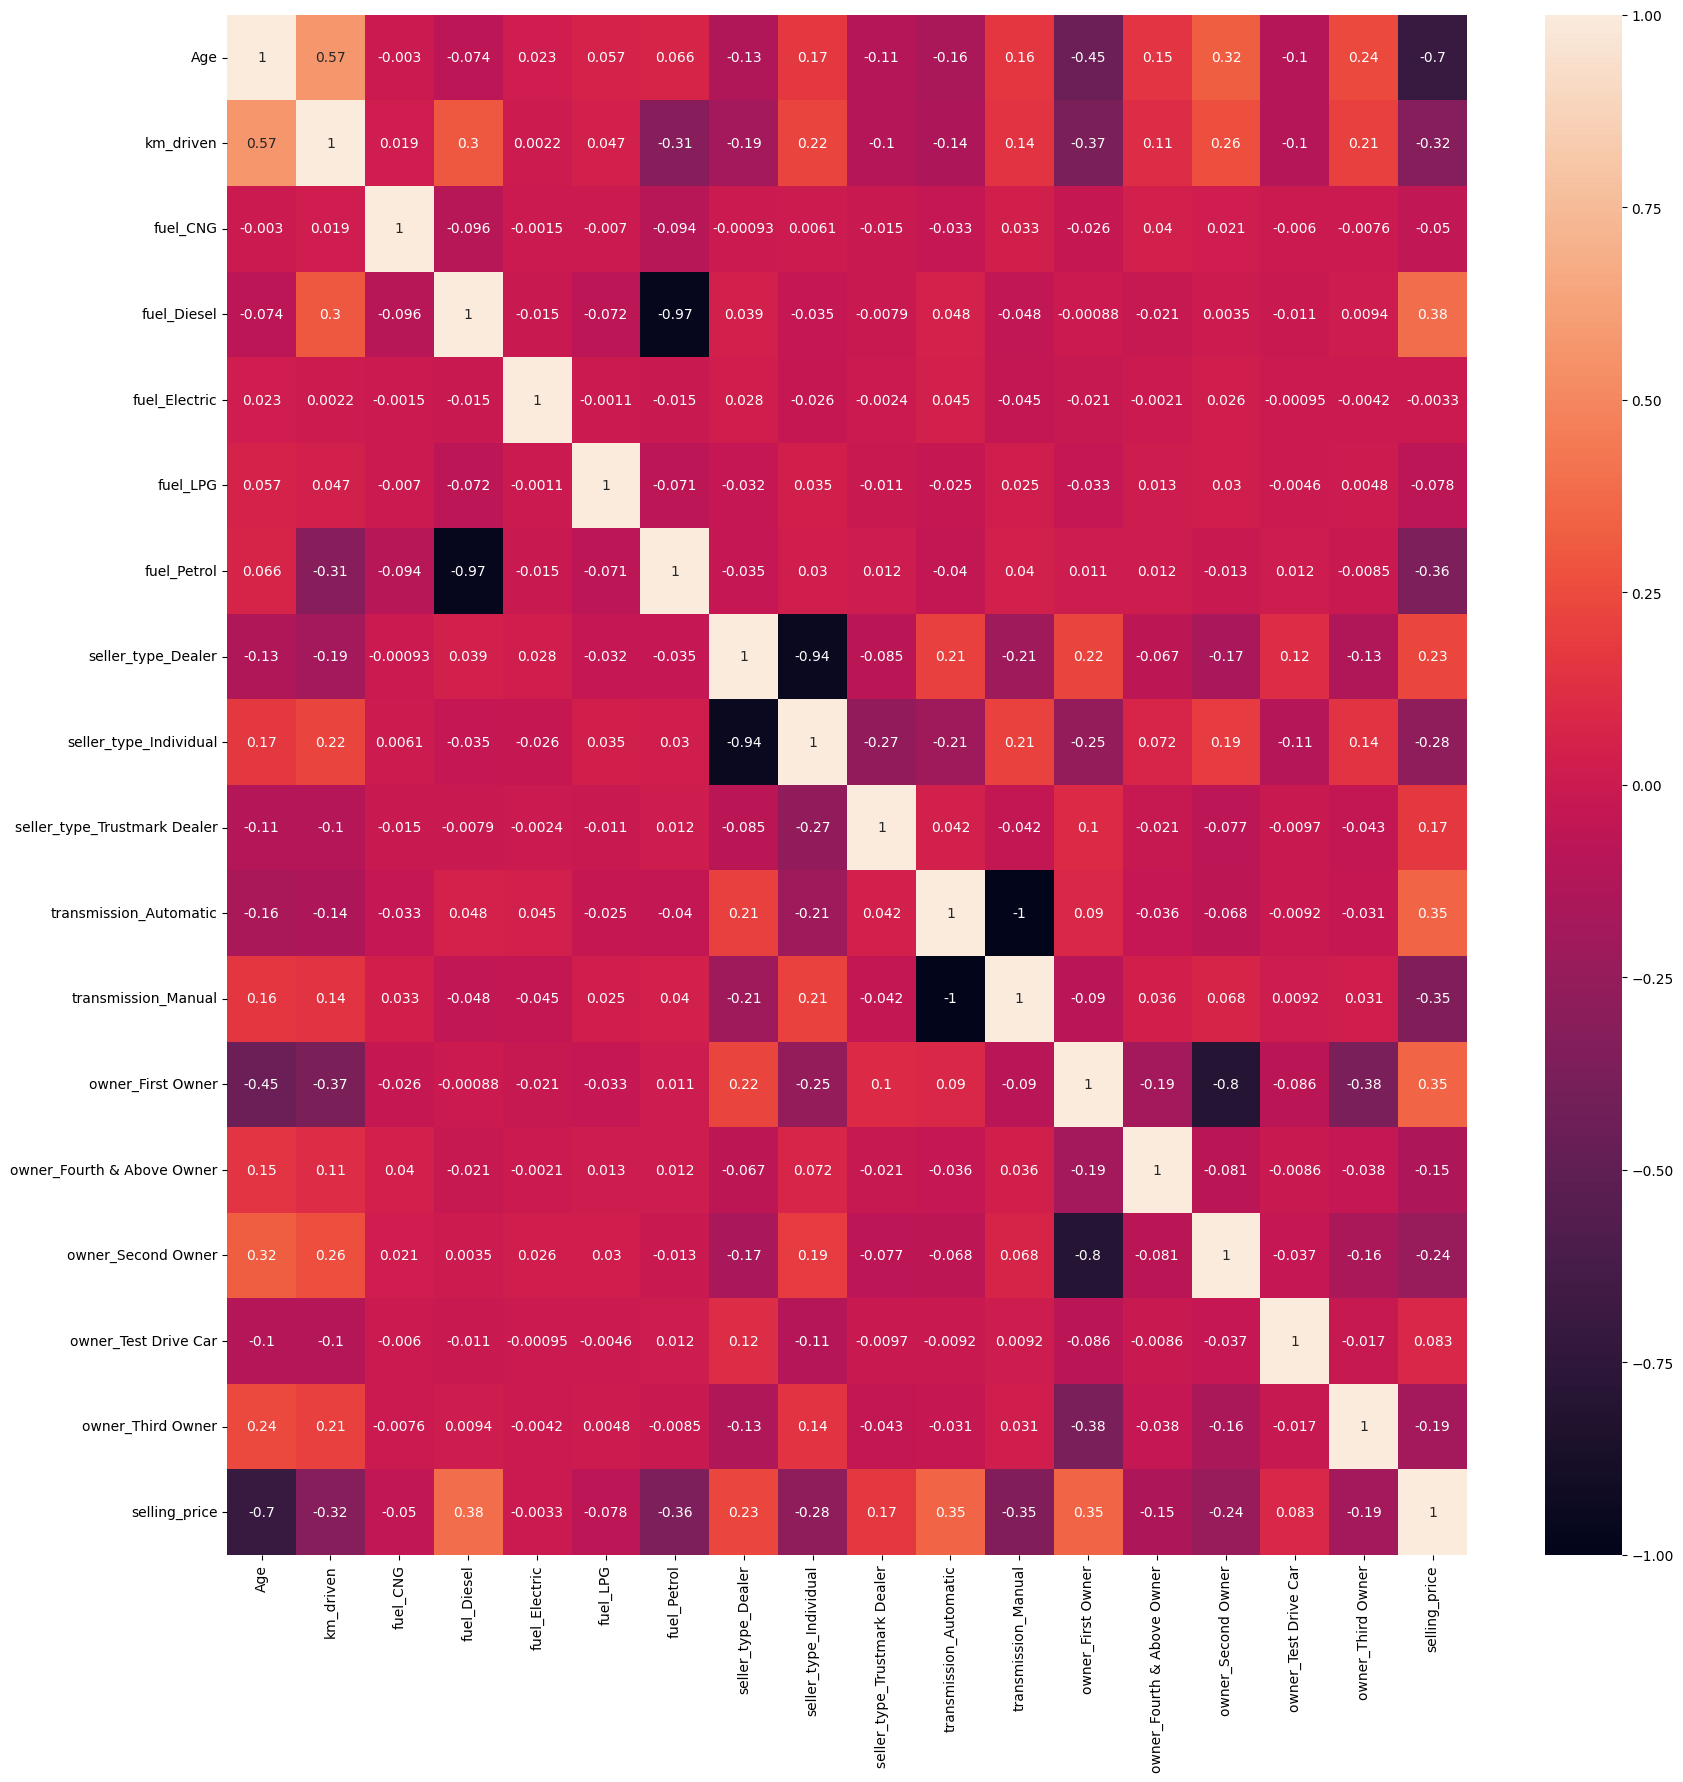

In [182]:
dt3 = pd.concat([
    dt2x.reset_index(drop=True),
    dt2y.reset_index(drop=True)
], axis=1)
display(dt3.head(5))
# dt3 = dt3.drop(columns=['name'])
c=dt3.corr(method='spearman')
plt.figure(figsize=(20,20))
sns.heatmap(c,annot=True)

847

4340

3493

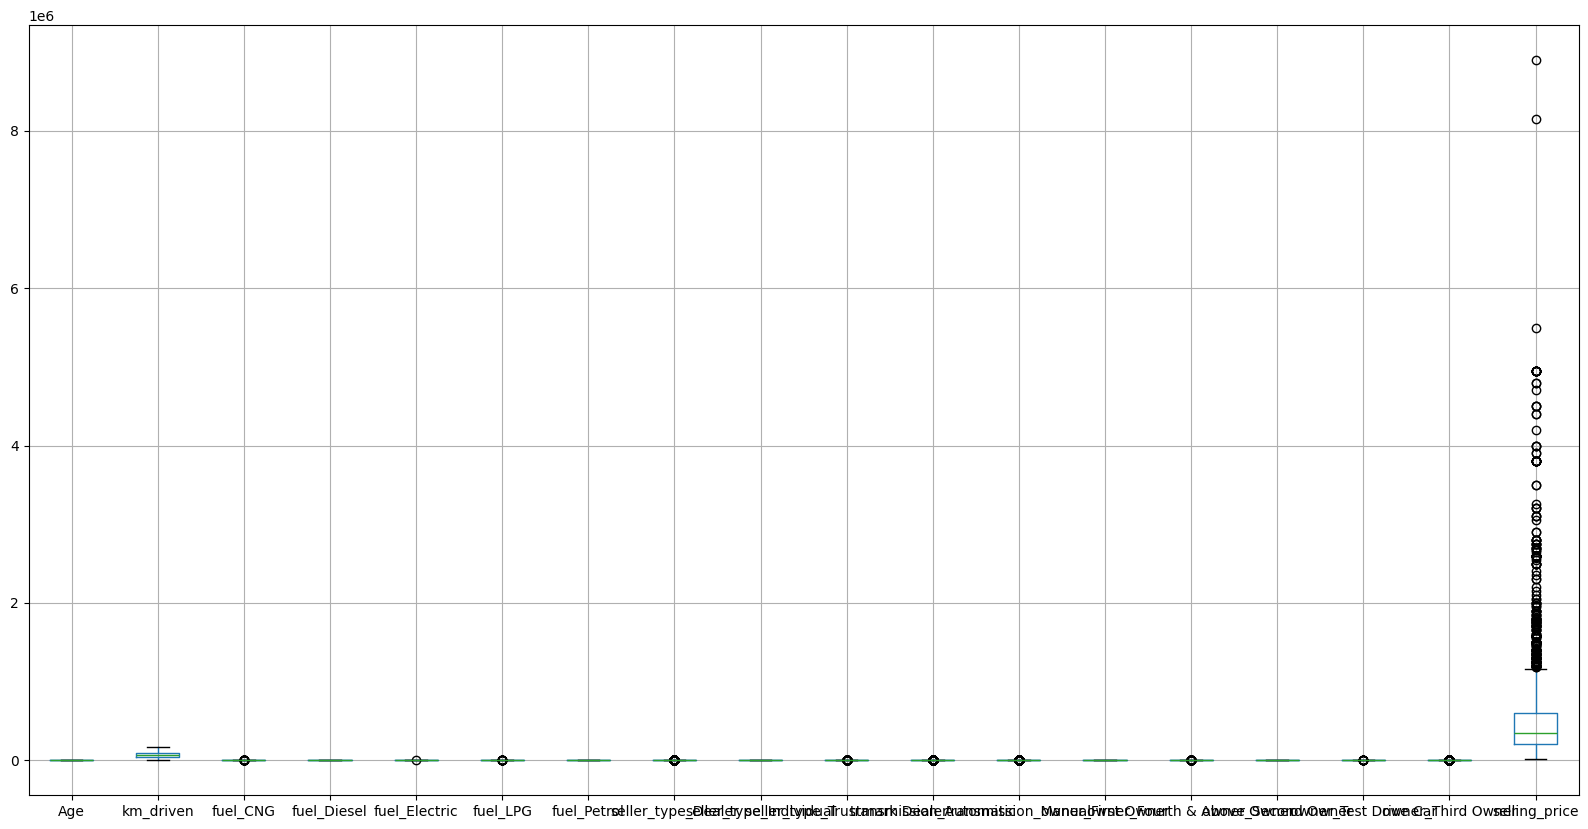

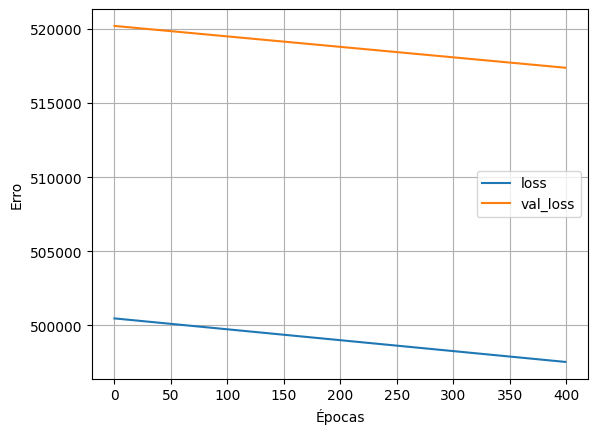

45/45 [==============================] - 0s 615us/step
-500580.6110781066


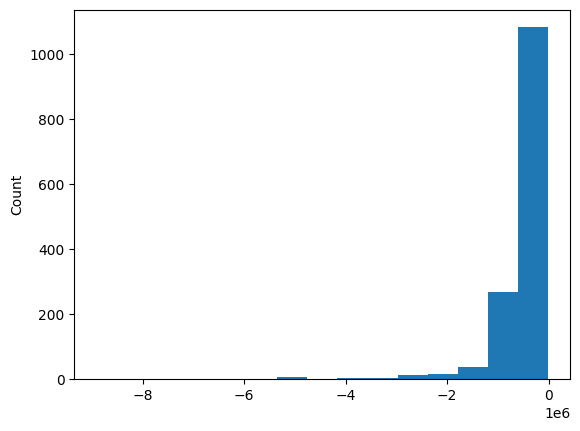

In [188]:

display(dt3.duplicated().sum())
display(len(dt3))
display(len(dt3.drop_duplicates()))

dfy = dt3.selling_price
dfx = dt3.drop(columns=['selling_price'])
dfx = np.asarray(dfx).astype('float32')



dt3.boxplot(figsize=(20,10))
plt.show()
X_train, X_test, y_train, y_test = shuffle(dfx, dfy)

regressaoLinear(X_train, y_train, X_test, y_test)

847

4340

3493

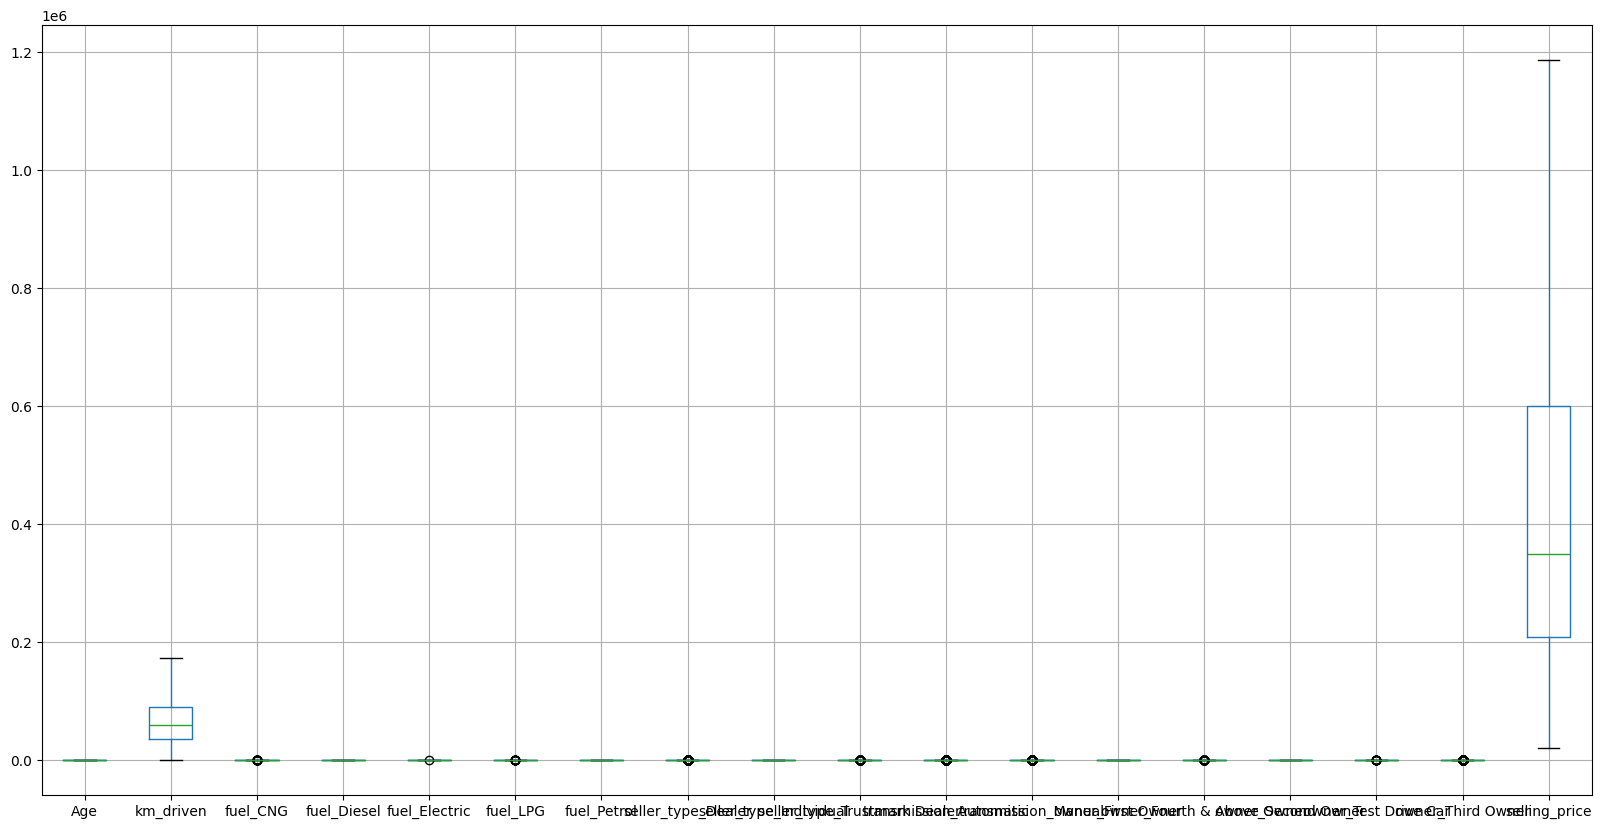

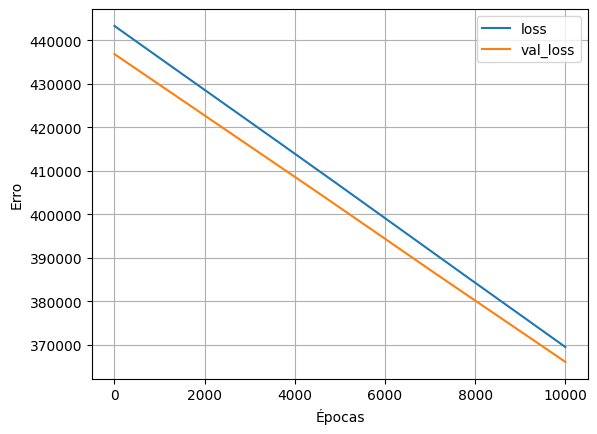

45/45 [==============================] - 0s 1ms/step
-368104.4966798238


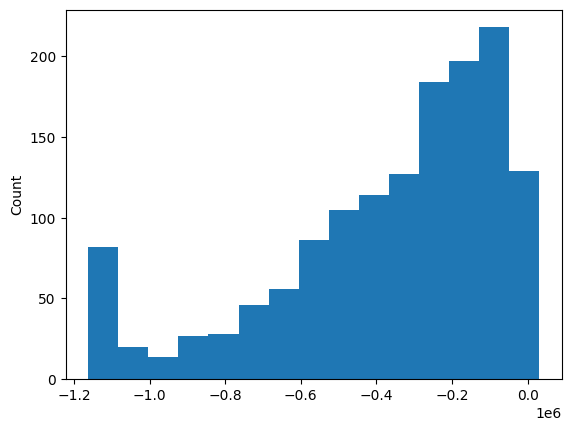

In [190]:
dfT=dt3.copy()

display(dfT.duplicated().sum())
display(len(dfT))
display(len(dfT.drop_duplicates()))

for col in ['selling_price']:
    Q1 = dfT[col].quantile(0.25)
    Q3 = dfT[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    dfT[col] = dfT[col].clip(lower=Q1 - k * IQR, upper=Q3 + k * IQR)

dfT.boxplot(figsize=(20,10))
plt.show()
dfy = dfT.selling_price
dfx = dfT.drop(columns=['selling_price'])


dfx = np.asarray(dfx).astype('float32')

X_train, X_test, y_train, y_test = shuffle(dfx, dfy)
regressaoLinear(X_train, y_train, X_test, y_test)